# nCov2019数据分析

## 数据来源

本数据来源于[2019新型冠状病毒疫情时间序列数据仓库](https://github.com/BlankerL/DXY-2019-nCoV-Data)，其数据来源为[丁香园](https://3g.dxy.cn/newh5/view/pneumonia)。

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_util
import plot_util

from IPython.display import display, Markdown

In [2]:
raw_data = data_util.load_data()

## 全国数据校验

全国数据是数值较大、自然增长、概率分布、应不受人为干预的数据，所以它应该满足[本福特定律](https://baike.baidu.com/item/本福特定律)（Benford's Law, First-Digit Law），即数据首位数字越小它出现概率越高。比如首位数字是1的概率比9高很多。

本福特定律只是数据真实的必要不充分条件，如果只公布部分数据，且已公布数据也恰好符合上面条件，则可以规避开本数据校验。

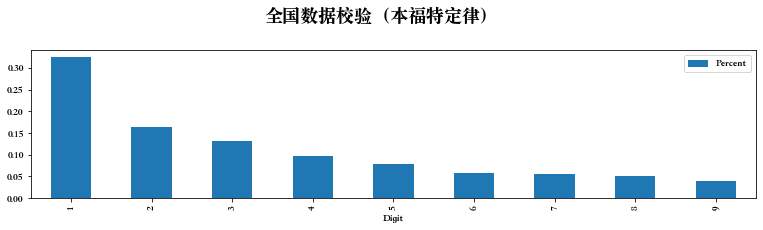

In [3]:
raw_city_confirmed = raw_data['city_confirmedCount']

benford_raw = data_util.benford(raw_city_confirmed)
figure = plot_util.plot_bar(benford_raw, '全国数据校验（本福特定律）', 'Digit', 'Percent')

In [4]:
city_name = '深圳'

In [5]:
display(Markdown('## ' + city_name + '数据'))

## 深圳数据

In [6]:
raw_data = data_util.load_data()

In [7]:
display(Markdown('### ' + city_name + '累计数量'))

### 深圳累计数量

In [8]:

city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
5580,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,416,0,199,2,2020-02-20 19:07:19.834,2020-02-20,0.480769,47.836538
4495,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,416,0,222,2,2020-02-21 18:12:13.066,2020-02-21,0.480769,53.365385
2753,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,417,0,226,2,2020-02-22 18:01:40.406,2020-02-22,0.479616,54.196643
1065,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,417,0,237,3,2020-02-23 19:19:02.938,2020-02-23,0.719424,56.834532
32,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,417,0,249,3,2020-02-24 18:16:54.754,2020-02-24,0.719424,59.712230


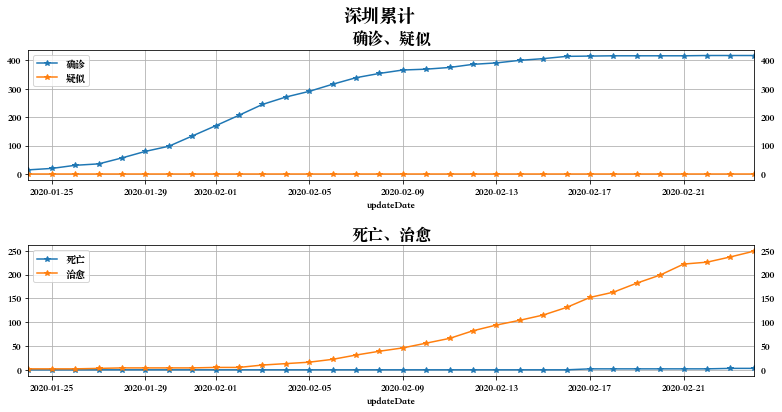

In [9]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [10]:
display(Markdown('### ' + city_name + '增长速度'))

### 深圳增长速度

In [11]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
5580,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,0.0,0.0,17.0,0.0,2020-02-20 19:07:19.834,2020-02-20,0.000000,4.086538
4495,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,0.0,0.0,23.0,0.0,2020-02-21 18:12:13.066,2020-02-21,0.000000,5.528846
2753,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,1.0,0.0,4.0,0.0,2020-02-22 18:01:40.406,2020-02-22,-0.001153,0.831258
1065,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,0.0,0.0,11.0,1.0,2020-02-23 19:19:02.938,2020-02-23,0.239808,2.637890
32,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,0.0,0.0,12.0,0.0,2020-02-24 18:16:54.754,2020-02-24,0.000000,2.877698


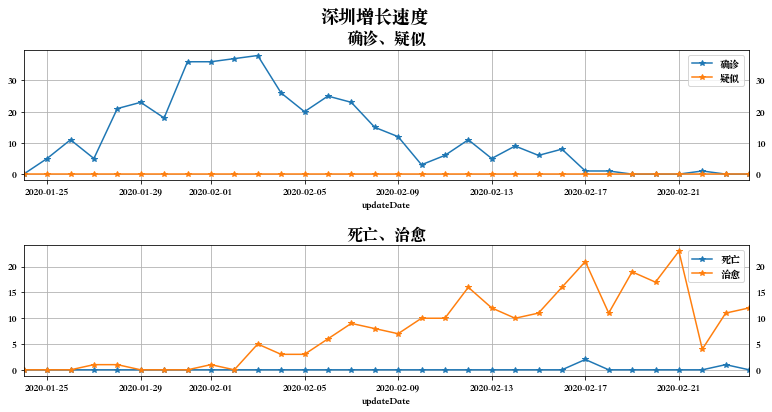

In [12]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [13]:
display(Markdown('### ' + city_name + '增长加速度'))

### 深圳增长加速度

In [14]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
5580,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,0.0,0.0,-2.0,0.0,2020-02-20 19:07:19.834,2020-02-20,0.000000,-0.480769
4495,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,0.0,0.0,6.0,0.0,2020-02-21 18:12:13.066,2020-02-21,0.000000,1.442308
2753,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,1.0,0.0,-19.0,0.0,2020-02-22 18:01:40.406,2020-02-22,-0.001153,-4.697588
1065,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,-1.0,0.0,7.0,1.0,2020-02-23 19:19:02.938,2020-02-23,0.240961,1.806632
32,广东省,Guangdong,440000,深圳,Shenzhen,440300.0,0.0,0.0,1.0,-1.0,2020-02-24 18:16:54.754,2020-02-24,-0.239808,0.239808


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


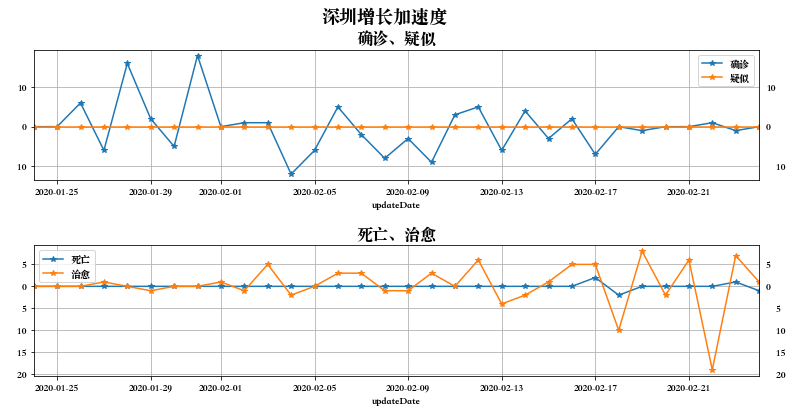

In [15]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [16]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 深圳死亡治愈率

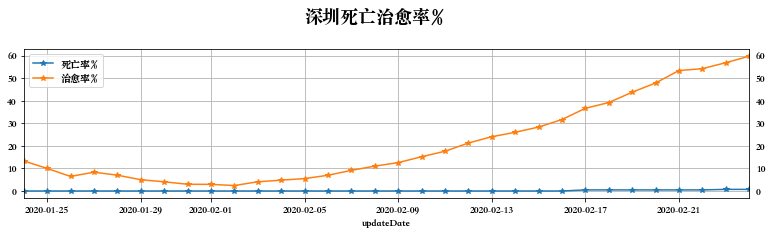

In [17]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')

In [18]:
black_province_name = '湖北省'

In [19]:
display(Markdown('## 全国数据（除' + black_province_name + '）'))

## 全国数据（除湖北省）

In [20]:
display(Markdown('因' + black_province_name + '灾情特别严重且现已隔离（' + black_province_name + '加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。'))

因湖北省灾情特别严重且现已隔离（湖北省加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。

In [21]:
display(Markdown('## 全国累计（除' + black_province_name + '）'))

## 全国累计（除湖北省）

In [22]:
white_daily_data = data_util.aggregate_daily_except(raw_data, province_name=black_province_name)
white_daily_data = data_util.calculate_dead_cured_rate(white_daily_data)

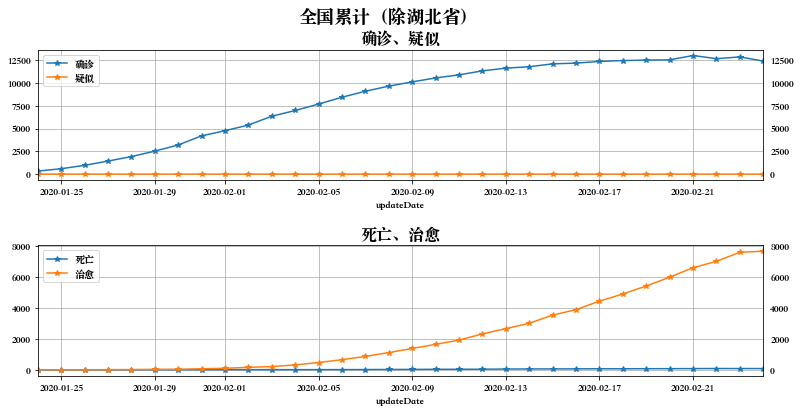

In [23]:
figure = plot_util.plot_conf_main(white_daily_data, '全国累计（除' + black_province_name + '）')

In [24]:
display(Markdown('## 全国增长速度（除' + black_province_name + '）'))

## 全国增长速度（除湖北省）

In [25]:
white_daily_data_1st_derivative = data_util.diff(white_daily_data)
white_daily_data_1st_derivative.tail()

,province_zipCode,city_zipCode,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,,,
2020-02-20,151280000,139543970.0,25.0,0.0,572.0,2.0,0.014783,4.479124
2020-02-21,153240000,140806270.0,476.0,0.0,610.0,4.0,0.008554,2.937501
2020-02-22,140740000,129510470.0,-348.0,0.0,418.0,6.0,0.064324,4.700671
2020-02-23,152910000,141346370.0,196.0,0.0,583.0,-2.0,-0.025925,3.689261
2020-02-24,130300000,123221439.0,-456.0,0.0,71.0,-1.0,0.015976,2.751535


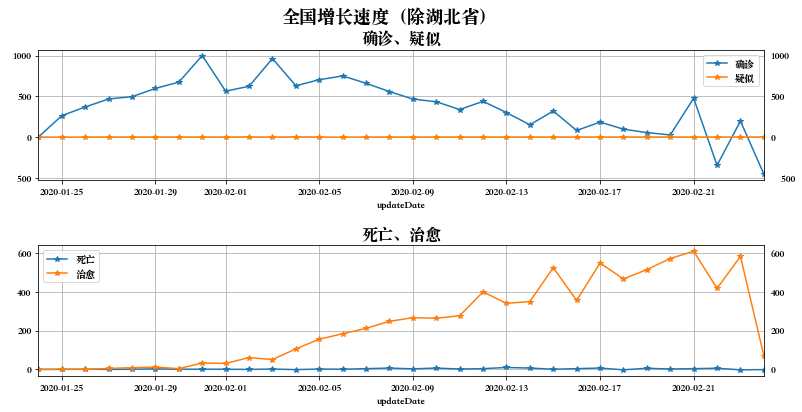

In [26]:
figure = plot_util.plot_conf_main(white_daily_data_1st_derivative, '全国增长速度（除' + black_province_name + '）')

In [27]:
display(Markdown('## 全国增长加速度（除' + black_province_name + '）'))

## 全国增长加速度（除湖北省）

In [28]:
white_daily_data_2nd_derivative = data_util.diff(white_daily_data_1st_derivative)
white_daily_data_2nd_derivative.tail()

,province_zipCode,city_zipCode,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,,,
2020-02-20,151280000,139543970.0,-29.0,0.0,57.0,-4.0,-0.030846,0.530595
2020-02-21,153240000,140806270.0,451.0,0.0,38.0,2.0,-0.006229,-1.541622
2020-02-22,140740000,129510470.0,-824.0,0.0,-192.0,2.0,0.055770,1.763170
2020-02-23,152910000,141346370.0,544.0,0.0,165.0,-8.0,-0.090249,-1.011410
2020-02-24,130300000,123221439.0,-652.0,0.0,-512.0,1.0,0.041901,-0.937726


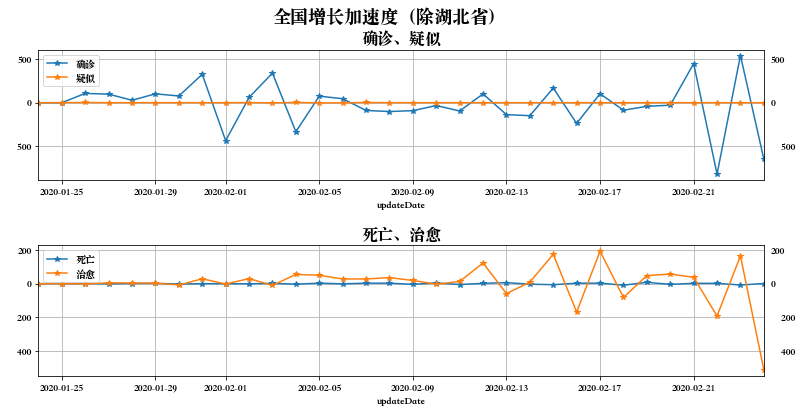

In [29]:
figure = plot_util.plot_conf_main(white_daily_data_2nd_derivative, '全国增长加速度（除' + black_province_name + '）')

In [30]:
display(Markdown('## 全国增死亡治愈率（除' + black_province_name + '）'))

## 全国增死亡治愈率（除湖北省）

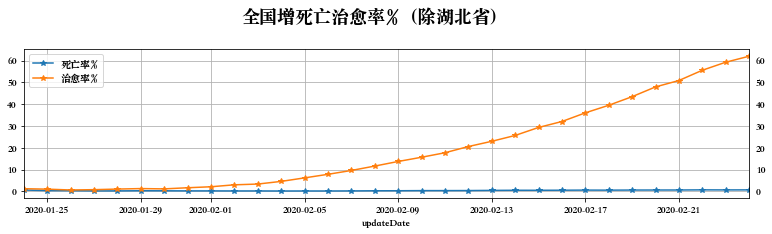

In [31]:
figure = plot_util.plot_conf_dead_cured_ratio(white_daily_data, '全国增死亡治愈率%（除' + black_province_name + '）')

In [32]:
city_name = '武汉'

In [33]:
display(Markdown('## ' + city_name + '数据'))

## 武汉数据

In [34]:
raw_data = data_util.load_data()

In [35]:
display(Markdown('### ' + city_name + '累计数量'))

### 武汉累计数量

In [36]:
city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
5336,湖北省,Hubei,420000,武汉,Wuhan,420100.0,45027,0,5598,1585,2020-02-20 22:08:31.581,2020-02-20,3.520110,12.432540
4068,湖北省,Hubei,420000,武汉,Wuhan,420100.0,45346,0,6281,1684,2020-02-21 20:57:17.698,2020-02-21,3.713668,13.851277
2545,湖北省,Hubei,420000,武汉,Wuhan,420100.0,45660,0,7292,1774,2020-02-22 20:55:28.727,2020-02-22,3.885239,15.970215
928,湖北省,Hubei,420000,武汉,Wuhan,420100.0,46201,0,8189,1856,2020-02-23 20:06:03.658,2020-02-23,4.017229,17.724725
0,湖北省,Hubei,420000,武汉,Wuhan,420100.0,46607,0,8950,1987,2020-02-24 19:12:21.027,2020-02-24,4.263308,19.203124


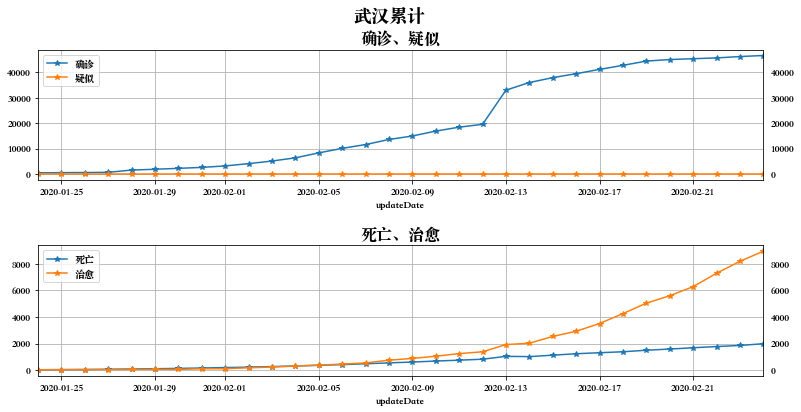

In [37]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [38]:
display(Markdown('### ' + city_name + '增长速度'))

### 武汉增长速度

In [39]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
5336,湖北省,Hubei,420000,武汉,Wuhan,420100.0,615.0,0.0,558.0,88.0,2020-02-20 22:08:31.581,2020-02-20,0.149400,1.084256
4068,湖北省,Hubei,420000,武汉,Wuhan,420100.0,319.0,0.0,683.0,99.0,2020-02-21 20:57:17.698,2020-02-21,0.193558,1.418736
2545,湖北省,Hubei,420000,武汉,Wuhan,420100.0,314.0,0.0,1011.0,90.0,2020-02-22 20:55:28.727,2020-02-22,0.171570,2.118938
928,湖北省,Hubei,420000,武汉,Wuhan,420100.0,541.0,0.0,897.0,82.0,2020-02-23 20:06:03.658,2020-02-23,0.131990,1.754510
0,湖北省,Hubei,420000,武汉,Wuhan,420100.0,406.0,0.0,761.0,131.0,2020-02-24 19:12:21.027,2020-02-24,0.246079,1.478399


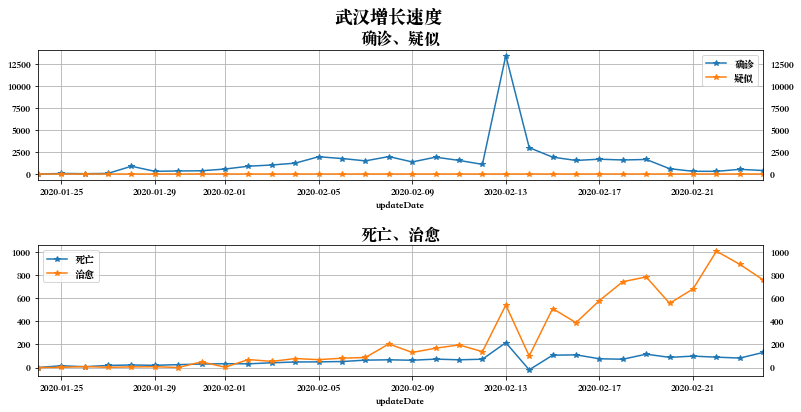

In [40]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [41]:
display(Markdown('### ' + city_name + '增长加速度'))

### 武汉增长加速度

In [42]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
5336,湖北省,Hubei,420000,武汉,Wuhan,420100.0,-1045.0,0.0,-229.0,-28.0,2020-02-20 22:08:31.581,2020-02-20,0.008947,-0.315955
4068,湖北省,Hubei,420000,武汉,Wuhan,420100.0,-296.0,0.0,125.0,11.0,2020-02-21 20:57:17.698,2020-02-21,0.044159,0.334480
2545,湖北省,Hubei,420000,武汉,Wuhan,420100.0,-5.0,0.0,328.0,-9.0,2020-02-22 20:55:28.727,2020-02-22,-0.021988,0.700201
928,湖北省,Hubei,420000,武汉,Wuhan,420100.0,227.0,0.0,-114.0,-8.0,2020-02-23 20:06:03.658,2020-02-23,-0.039580,-0.364428
0,湖北省,Hubei,420000,武汉,Wuhan,420100.0,-135.0,0.0,-136.0,49.0,2020-02-24 19:12:21.027,2020-02-24,0.114089,-0.276111


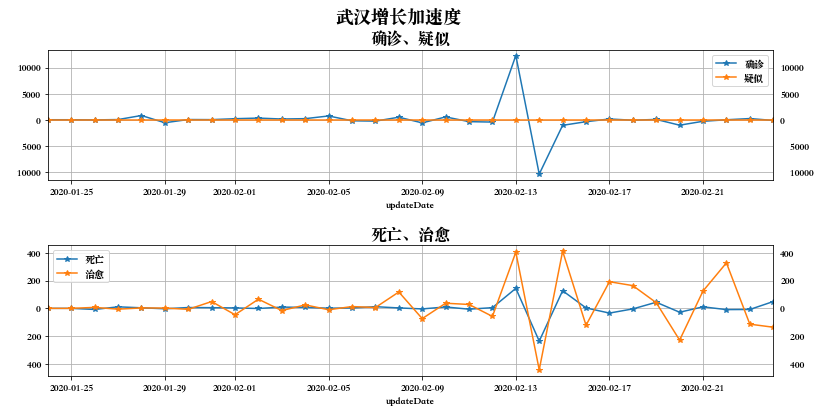

In [43]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [44]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 武汉死亡治愈率

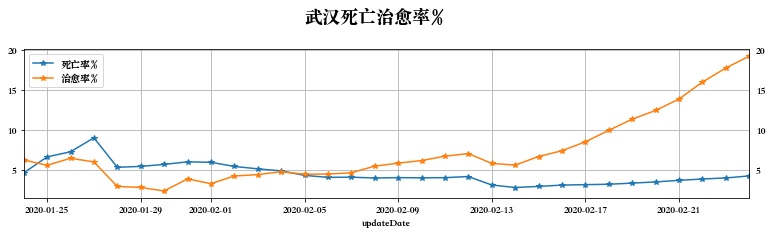

In [45]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')

In [46]:
display(Markdown('### ' + city_name + '数据校验'))

### 武汉数据校验

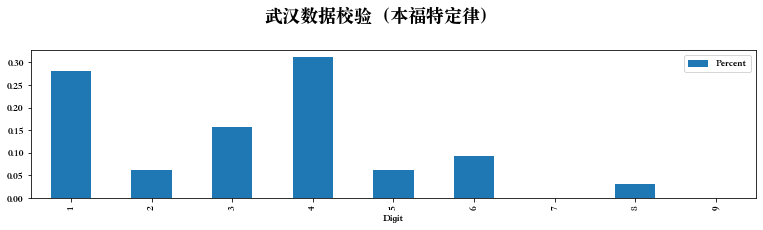

In [47]:
city_confirmed = city_daily_data['confirmed']

benford_raw = data_util.benford(city_confirmed)
figure = plot_util.plot_bar(benford_raw, city_name + '数据校验（本福特定律）', 'Digit', 'Percent')